
<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 7 </p>

 <p align="center"> Fase 5 - Prueba Objetiva Abierta</p>

 <p align="center">  Presentado por: Juan José García Sánchez</p>

<p align="center"> Código: 1703</p>

 <p align="center">  Tutor(a): Isaac Camargo Freile </p>

 <p align="center"> 17/07/2024</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>



# Importar librerias

In [77]:
from enum import Enum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
#las funciones definidas aqui se usaran mas adelantes en el ejercicio, son para calcular metricas y graficar

def mostrar_metricas(y_real, y_predicho, decimales = 4):
    
    mse = metrics.mean_squared_error(y_real, y_predicho)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_real, y_predicho)
    mae =  metrics.mean_absolute_error(y_real, y_predicho)
    print(
    f"R2  : {r2:.{decimales}f}",
    f"MSE : {mse:.{decimales}f}",
    f"RMSE: {rmse:.{decimales}f}",
    f"MAE : {mae:.{decimales}f}",
    sep = "\n",
    )


def matriz_confusion(y_real, y_predicho):
    matriz = metrics.confusion_matrix(y_real, y_predicho)
    heatmap(matriz, "Matriz Confusion", "d")
    ax = plt.gca()
    ax.set_xlabel("Valor Predicho")
    ax.set_ylabel("Valor Real")


def heatmap(matriz, titulo, formato=".2f", tamaño = (4, 4), mapa="Reds"):
    plt.figure(figsize=tamaño)
    sns.heatmap(matriz, annot=True, cmap=mapa, fmt=formato)
    plt.title(titulo)

#funcion para obtener el nivel de productividad

#funcion para calcular nivel productividad (productividad alta: 1; productividad baja: 0)
obtener_nivel = lambda array: np.where(array > 0.7, 1, 0)

# Limpieza de datos

In [78]:
# Carga los datos en un dataframe de Pandas

#limpiado de datos, el archivo csv debe estar en el mismo directorio
df_crudo = pd.read_csv('Anexo 1- Base de Datos dynamic_pricing.csv')

df_crudo.drop_duplicates()

#limpieza hecha para los tres modelos: modelo lineal, logistico, y knn. se elimina la columna "wip"
df_modelos = df_crudo.dropna(axis=1)

# 1. Analisis Unidimensional

In [79]:
df_modelos.head(20)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [17]:
for campo in df_modelos.columns:
    print(df_modelos[campo].value_counts())

Number_of_Riders
100    19
53     18
93     18
94     18
61     18
       ..
78      8
66      7
81      7
41      7
82      7
Name: count, Length: 81, dtype: int64
Number_of_Drivers
7     52
6     41
8     38
9     35
13    31
      ..
52     1
84     1
89     1
85     1
82     1
Name: count, Length: 79, dtype: int64
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Number_of_Past_Rides
88    21
15    17
67    17
24    16
26    16
      ..
43     5
29     5
4      5
50     4
81     3
Name: count, Length: 101, dtype: int64
Average_Ratings
4.20    13
4.44    13
4.30    13
3.60    12
4.59    12
        ..
3.70     2
4.94     2
4.67     2
4.53     1
3.89     1
Name: count, Length: 151, dtype: int64
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64
Vehicle_Type
Premium    522
Economy    478
Name:

## 1. Clasificacion de variables en estudio:

|Variables | Descripcion | Clasificacion| Niveles |
|---|---|---|---|
| Numero de Pasajeros | Cantidad de pasajeros solicitando viajes en el area | numerica | - |
| Numero de Conductores | Cantidad de Conductores disponibles en el area | numerica | - |
| Area | Tipo de zona donde se solicita el viaje | nominal | Urban, Rural y Suburban |
| Clase Cliente | Nivel de clasificacion del cliente por lealtad a la empresa | ordinal | Regular, Silver, Gold |
| Cantidad Viajes Pasados | Cantidad de viajes que el cliente ha hecho en el servicio | numerica | - |
| Puntaje Promedio | Puntaje Promedio de los viajes | numerica | - |
| Hora de agendar | Tiempo del dia en el cual se agendo el viaje | nominal | Night, Afternoon, Morning, Evening |
| Tipo de Vehiculo | Clase de Vehiculo, respecto a comodidad y tecnologia, pedidos en el pasado | nominal | Premium, Economy |
| Duracion Esperada Viaje | Duracion esperada del viaje en horas | numerica | - |
| Costo Historico Viaje | Costo historico (promedio) del viaje | numerica | - |


In [131]:
def tabla_frecuencia(datos: pd.DataFrame, campo:str):
    """
    Construye una un dataframe, calculando las frecuencias 
    absolutas y relativas del campo dado.
    """
    frec = pd.crosstab(datos[campo], "frecuencia")

    relativa = frec / datos.shape[0]

    frec["relativa"] = relativa

    frec.loc["suma"] = [datos.shape[0], relativa["frecuencia"].sum()]

    return frec

def medidas_resumen(datos:pd.DataFrame, campo:str):

    res = datos[campo].describe()

    res["var"] = datos[campo].var()

    res = pd.DataFrame(res)

    return res


Enumeraciones de la variables. Unicamente para la facilidad de uso, no influye en el analisis de datos

In [138]:
class Categ(Enum):
    locacion = "Location_Category"
    lealtad = "Customer_Loyalty_Status"
    tiempo_viaje = "Time_of_Booking"
    vehiculo = "Vehicle_Type"


class Num(Enum):
    viajes_pasados = "Number_of_Past_Rides"
    puntaje_promedio = "Average_Ratings"
    pasajeros = "Number_of_Riders" 	
    conductores = "Number_of_Drivers"
    duracion_esperada = "Expected_Ride_Duration"
    costo_historico = "Historical_Cost_of_Ride"

## 2. Analisis de Variables 

### **Locación del viaje**

#### Frecuencias

In [94]:
tabla_frecuencia(df_modelos, Categ.locacion.value)

col_0,frecuencia,relativa
Location_Category,,
Rural,332.0,0.332
Suburban,322.0,0.322
Urban,346.0,0.346
suma,1000.0,1.000


#### Grafico

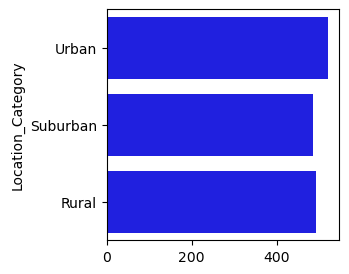

In [98]:
sns.barplot(df_modelos[Categ.locacion.value], color="b", errorbar=None, figure=plt.figure(figsize=(3,3)) )
plt.show()

#### Analisis

### **Lealtad del Cliente**

#### Frecuencias

In [99]:
tabla_frecuencia(df_modelos, Categ.lealtad.value)

col_0,frecuencia,relativa
Customer_Loyalty_Status,,
Gold,313.0,0.313
Regular,320.0,0.320
Silver,367.0,0.367
suma,1000.0,1.000


#### Grafico

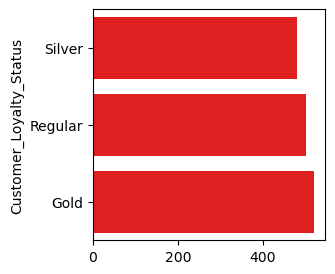

In [100]:
sns.barplot(df_modelos[Categ.lealtad.value], color="r", errorbar=None, figure=plt.figure(figsize=(3,3)) )
plt.show()

#### Analisis

### **Tiempo de Solucitud**

#### Frecuencias

In [104]:
tabla_frecuencia(df_modelos, Categ.tiempo_viaje.value)

col_0,frecuencia,relativa
Time_of_Booking,,
Afternoon,247.0,0.247
Evening,231.0,0.231
Morning,246.0,0.246
Night,276.0,0.276
suma,1000.0,1.000


#### Grafico

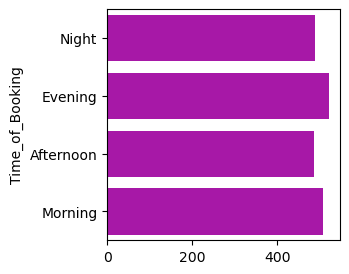

In [105]:
sns.barplot(df_modelos[Categ.tiempo_viaje.value], color="m", errorbar=None, figure=plt.figure(figsize=(3,3)) )
plt.show()

#### Analisis

### **Tipo de Vehiculo**

#### Frecuencias

In [106]:
tabla_frecuencia(df_modelos, Categ.vehiculo.value)

col_0,frecuencia,relativa
Vehicle_Type,,
Economy,478.0,0.478
Premium,522.0,0.522
suma,1000.0,1.000


#### Grafico

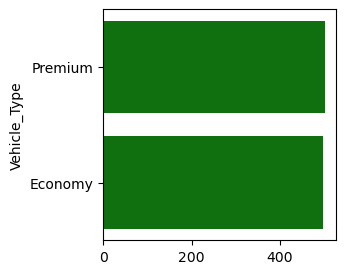

In [107]:
sns.barplot(df_modelos[Categ.vehiculo.value], color="g", errorbar=None, figure=plt.figure(figsize=(3,3)) )
plt.show()

#### Analisis

### **Cantidad de Viajeros**

#### Medidas de Resumen

In [132]:
medidas_resumen(df_modelos, Num.pasajeros.value)

,Number_of_Riders
count,1000.000000
mean,60.372000
std,23.701506
min,20.000000
25%,40.000000
50%,60.000000
75%,81.000000
max,100.000000
var,561.761377


#### Grafico

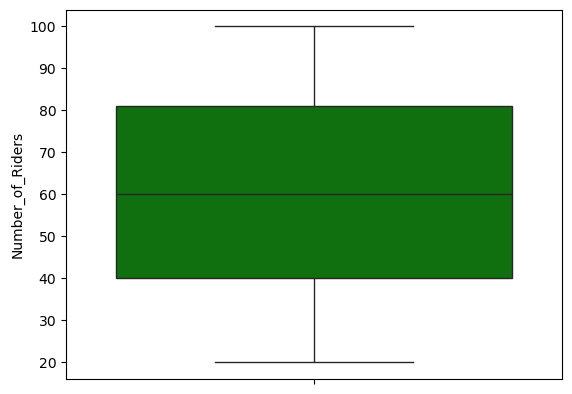

In [114]:
sns.boxplot(df_modelos[Num.pasajeros.value], color="g")
plt.show()

#### Analisis

### **Calificacion del Viaje**

#### Medidas de Resumen

In [134]:
medidas_resumen(df_modelos, Num.puntaje_promedio.value)

,Average_Ratings
count,1000.000000
mean,4.257220
std,0.435781
min,3.500000
25%,3.870000
50%,4.270000
75%,4.632500
max,5.000000
var,0.189905


#### Grafico

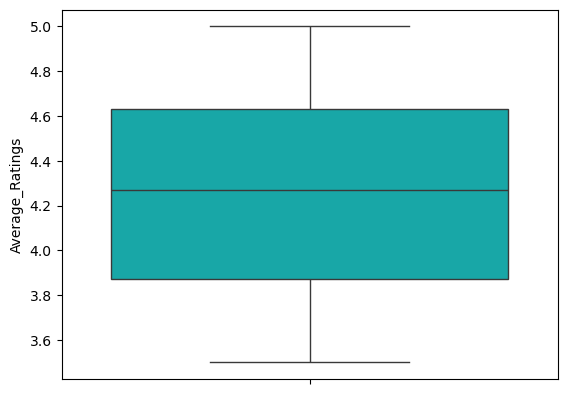

In [137]:
sns.boxplot(df_modelos[Num.puntaje_promedio.value], color="c")
plt.show()

#### Analisis

### **Duracion Esperada del Viaje**

#### Medidas de Resumen

In [139]:
medidas_resumen(df_modelos, Num.duracion_esperada.value)

,Expected_Ride_Duration
count,1000.000000
mean,99.588000
std,49.165450
min,10.000000
25%,59.750000
50%,102.000000
75%,143.000000
max,180.000000
var,2417.241497


#### Grafico

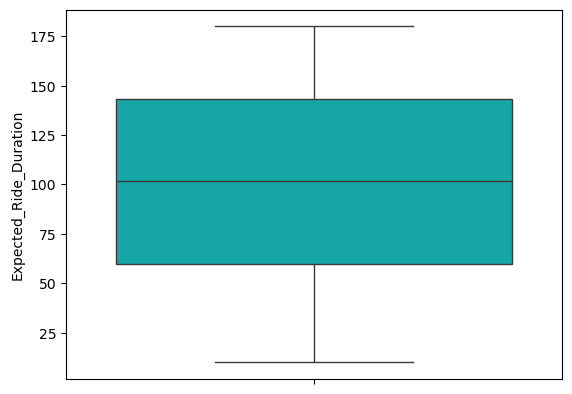

In [141]:
sns.boxplot(df_modelos[Num.duracion_esperada.value], color="c")
plt.show()

#### Analisis

### **Costo historico del Viaje**

#### Medidas de Resumen

In [142]:
medidas_resumen(df_modelos, Num.costo_historico.value)

,Historical_Cost_of_Ride
count,1000.000000
mean,372.502623
std,187.158756
min,25.993449
25%,221.365202
50%,362.019426
75%,510.497504
max,836.116419
var,35028.400030


#### Grafico

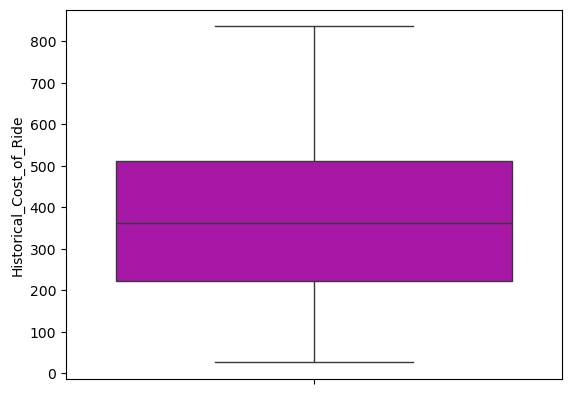

In [144]:
sns.boxplot(df_modelos[Num.costo_historico.value], color="m")
plt.show()

#### Analisis

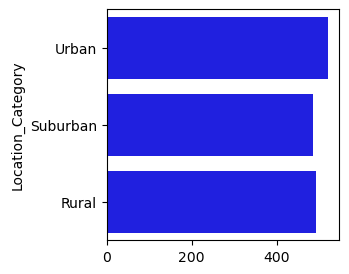

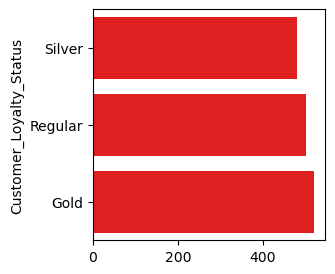

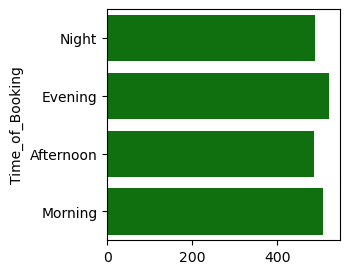

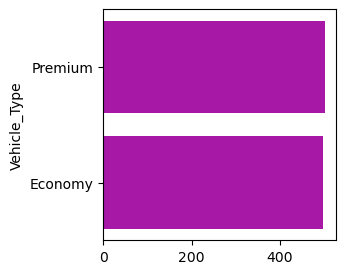

In [91]:
for variable, color in zip(Categ, ("b", "r", "g", "m")):
    fig = plt.figure(figsize=(3,3))
    
    
    plt.show()

# 2. Análisis Bidimensional e Inferencial.

## 1. Dispersion de pares

### Costo Historico del Viaje vs. Cantidad de pasajeros

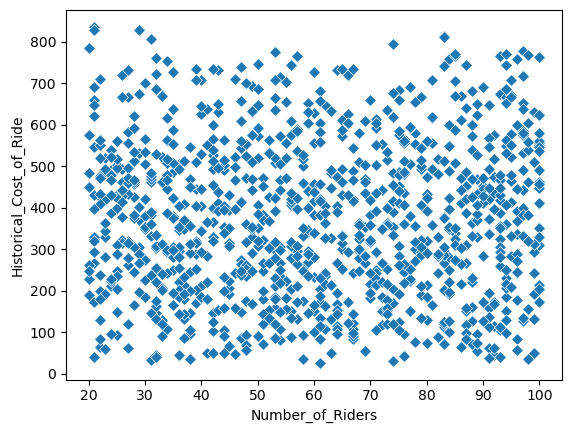

In [173]:
sns.scatterplot(df_modelos, x=Num.pasajeros.value, y=Num.costo_historico.value, marker="D" )
plt.show()

### Costo Historico del Viaje vs. Puntaje Promedio 

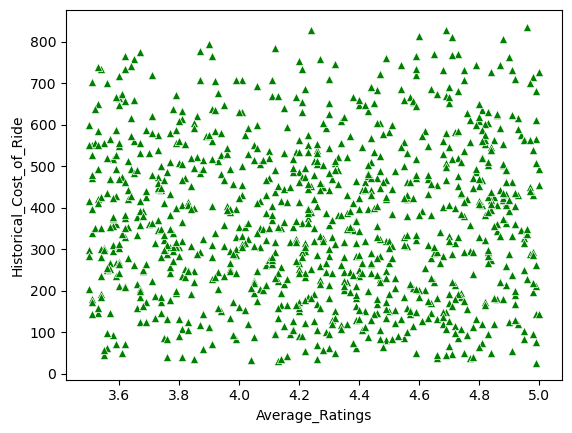

In [172]:
sns.scatterplot(df_modelos, x=Num.puntaje_promedio.value, y=Num.costo_historico.value, color="g", marker="^" )
plt.show()

### Costo Historico del Viaje vs. Duracion Esperada del Viaje 

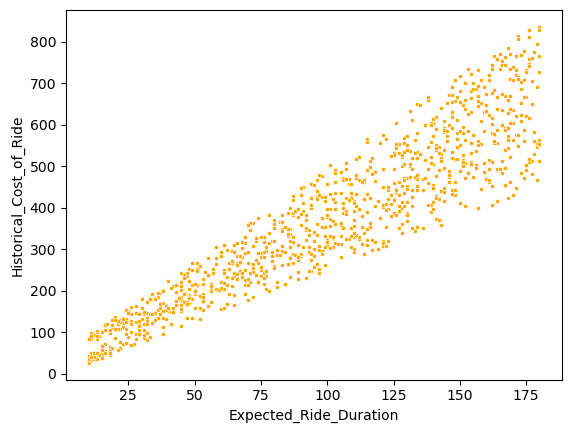

In [175]:
sns.scatterplot(df_modelos, x=Num.duracion_esperada.value, y=Num.costo_historico.value , color="orange", marker=".")
plt.show()

## 2. Correlaciones Entre Variables

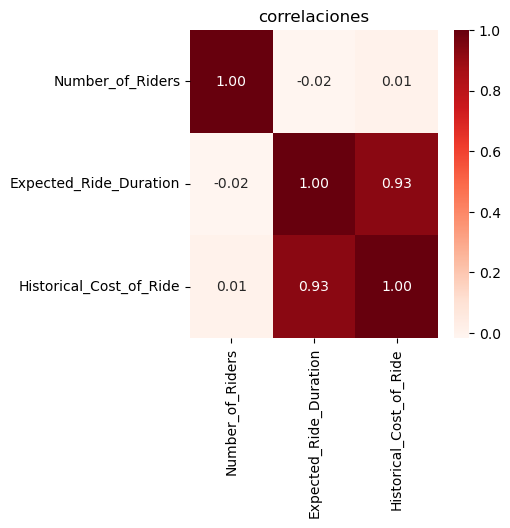

In [179]:
variables_interes = df_modelos[[Num.pasajeros.value, Num.duracion_esperada.value, Num.costo_historico.value]]
heatmap(variables_interes.corr(), "correlaciones")

# Aplicación K-NN.

- a. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.
- b. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Entrenar el modelo con el mejor valor de k

modelo_knn = Pipeline([
    ("preprocesamiento", prep_num),
    ("logistico", KNeighborsClassifier(n_neighbors=5))
])

modelo_knn.fit(X_entre, nivel_entre)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('escalado', MinMaxScaler(),
                                                  ['no_of_workers',
                                                   'over_time'])])),
                ('logistico', KNeighborsClassifier())])

In [32]:
nivel_entre_knn_pred = modelo_knn.predict(X_entre)
nivel_prueba_knn_pred = modelo_knn.predict(X_prueba)

 ## Prueba del Modelo

In [33]:
acc_entre = metrics.accuracy_score(nivel_entre, nivel_entre_knn_pred)
acc_prueba = metrics.accuracy_score(nivel_prueba, nivel_prueba_knn_pred)

print(f"precision entrenamiento: {acc_entre:0.3f}", )
print(f"precision prueba: {acc_prueba:0.3f}")


precision entrenamiento: 0.754
precision prueba: 0.692


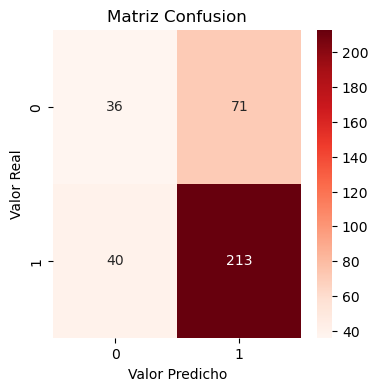

In [34]:
matriz_confusion(nivel_prueba, nivel_prueba_knn_pred)

In [35]:
print(metrics.classification_report(nivel_prueba, nivel_prueba_knn_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.34      0.39       107
         1.0       0.75      0.84      0.79       253

    accuracy                           0.69       360
   macro avg       0.61      0.59      0.59       360
weighted avg       0.67      0.69      0.67       360



# Aplicación Árboles de decisión (CART).

- a. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.
- b. Usando la función graphviz() visualizar el diagrama de árbol.
- c. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz

In [61]:
#definir el nivle de productivad, con la funcion de nivel

carac_numericas = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'targeted_productivity']

carac_categoricas = ['quarter', 'day']

caracteristicas = carac_numericas + carac_categoricas + ["team"]

prep_arbol = ColumnTransformer([
    ("numericas", MinMaxScaler(), carac_numericas),
    ("categoricas", OneHotEncoder(), carac_categoricas),
    ("equipo", OrdinalEncoder(), "team")]
)

df_arbol = df_arbol_crudo[caracteristicas]

bin = Binarizer(threshold=0.7)

df_arbol["nivel_productividad"] = bin.fit_transform(df_arbol_crudo["actual_productivity"] )

X_entre_arbol, X_prueba_arbol, nivel_arbol_entre, nivel_arbol_prueba = train_test_split(
    df_arbol.drop('nivel_productividad',axis=1),
    df_arbol["nivel_productividad"], 
    train_size=0.7, 
    random_state=42)

df_arbol.head(5)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [63]:
df_arbol["nivel_productividad"].__class__


KeyError: 'nivel_productividad'

In [54]:
# Creación del modelo, profundiad de 5, algoritmo gini

modelo_dt = Pipeline([
    ("preprocesamiento", prep_arbol),
    ("arbol", DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 42
          ))
])

# Entrenamiento del modelo
modelo_dt.fit(X_entre_arbol, nivel_arbol_entre)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
LabelEncoder.fit_transform

In [161]:
nivel_entre_dt_pred = modelo_dt.predict(X_entre_arbol)
nivel_prueba_dt_pred = modelo_dt.predict(X_prueba_arbol)

 ## Prueba del Modelo

In [1]:
acc_entre = metrics.accuracy_score(nivel_arbol_entre, nivel_entre_dt_pred)
acc_prueba = metrics.accuracy_score(nivel_arbol_prueba, nivel_prueba_dt_pred)

print(f"exactitud entrenamiento: {acc_entre:0.3f}", )
print(f"exactitud prueba: {acc_prueba:0.3f}")

NameError: name 'metrics' is not defined

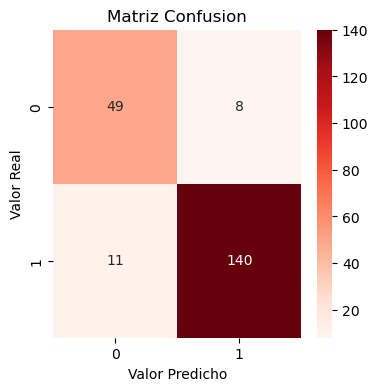

In [163]:
matriz_confusion(nivel_arbol_prueba, nivel_prueba_dt_pred)

In [164]:
print(metrics.classification_report(nivel_arbol_prueba, nivel_prueba_dt_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        57
         1.0       0.95      0.93      0.94       151

    accuracy                           0.91       208
   macro avg       0.88      0.89      0.89       208
weighted avg       0.91      0.91      0.91       208



In [42]:
archivo = "tree.dot"

export_graphviz(modelo_dt, 
                out_file=archivo, 
                feature_names=X_prueba.columns, 
                class_names=["Prod Bajo", "Prod Alto"],
                rounded=True, filled=True)

with open(archivo, "r") as rf:
    dot_graph = rf.read()
    
grf = graphviz.Source(dot_graph, format="png")


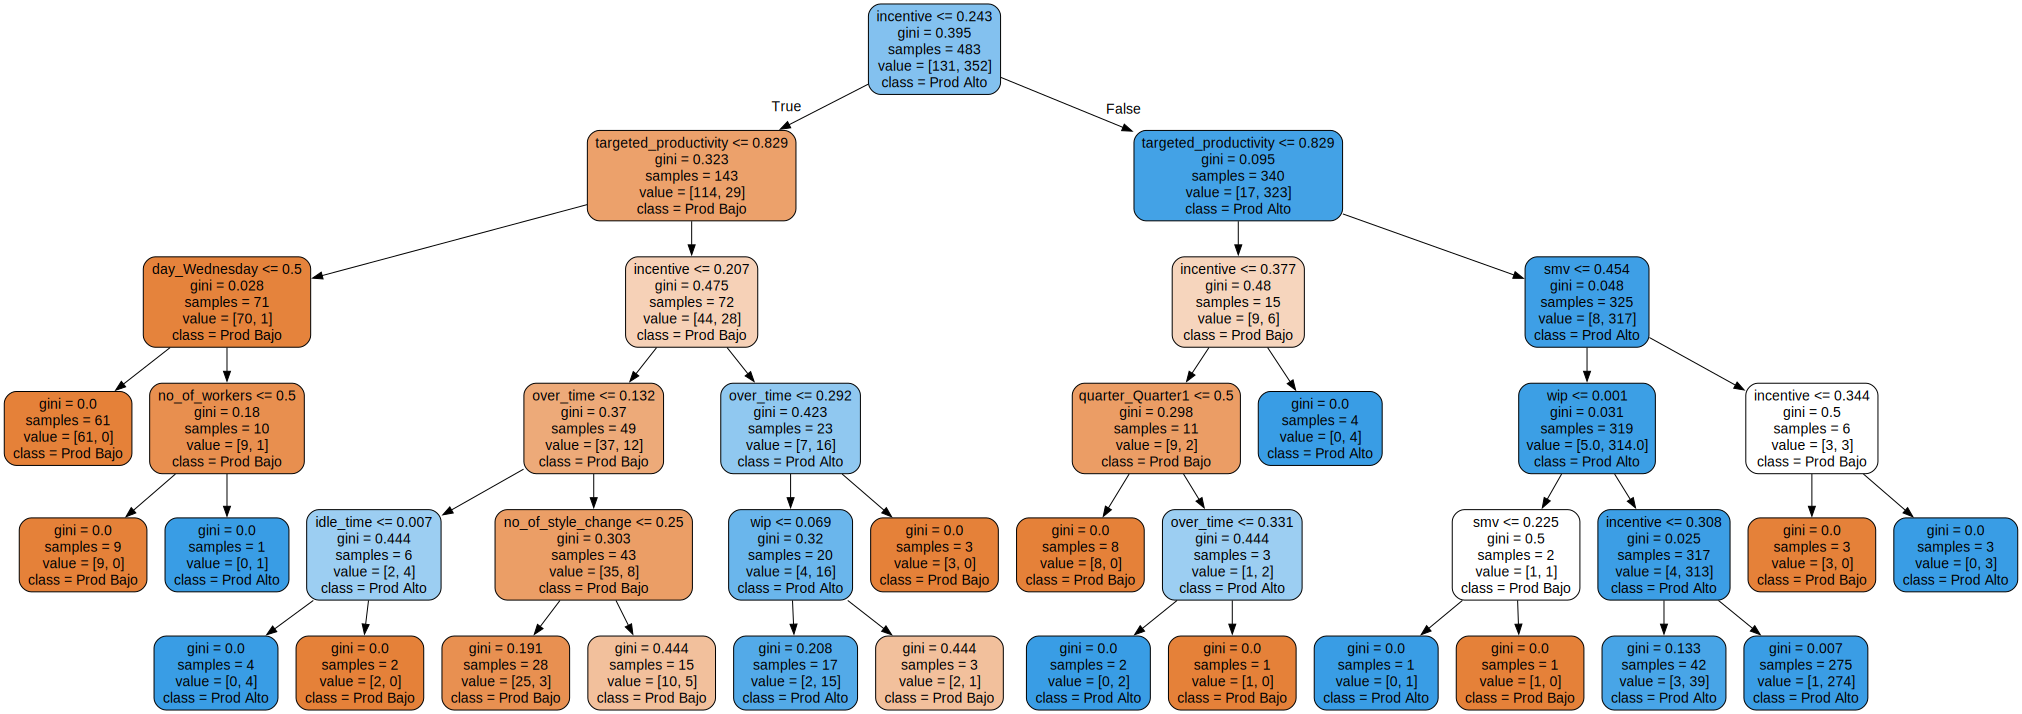

In [43]:
#visualizacion del arbol de decision
grf

# Referencias

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
Publishing. (pp. 183-195).
- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.
2nd ed. Packt Publishing. (pp. 90-103).